Pricing a product is a crucial aspect in any business. Alot of thought process is out into it. There are different strategies to price different kinds of products. There are products whose sales are quite sensitive to their prices and as such a small change in their price can lead to noticeable change in their sales. While there are products whose sales are not much affected by their price - these tend to be either luxury items or necessities (like certain medicines). This notebook will focus on the former type of products.

Price elasticity of demand (Epd), or elasticity, is the degree to which the effective desire for something changes as its price changes. In general, people desire things less as those things become more expensive. However, for some products, the customer's desire could drop sharply even with a little price increase, and for other products, it could stay almost the same even with a big price increase. Economists use the term elasticity to denote this sensitivity to price increases. More precisely, price elasticity gives the percentage change in quantity demanded when there is a one percent increase in price, holding everything else constant.

Mathematically speaking, the price elasticity of demand is defined to be the percentage change in quantity demanded, q,divided by the percentage change in price, p. The formula for the price elasticity (ǫ) is: $$e = \%ΔQ/ \%ΔP$$

In this work, we shall look at the sales of the items of a cafe. This cafe sells burgers, coke, lemonade and coffee. As a data scientist, it is our task to figure out the optimal prices to set for these items. If the price is set too high, the sales will drop & the price is set to low, then the margins will decrease. What is the sweet spot that will give us the maximum profit?

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder
import statsmodels.api as sm
from statsmodels.formula.api import ols
import datetime as dt


## Get multiple outputs in the same cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

## Ignore all warnings
import warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings(action='ignore', category=DeprecationWarning)

## Display all rows and columns of a dataframe instead of a truncated version
from IPython.display import display
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [7]:
sold = pd.read_csv("C:/Users/mncedisi.mncwabe/Videos/Practice/Price optimization/Cafe - Sell Meta Data.csv")
transactions = pd.read_csv("C:/Users/mncedisi.mncwabe/Videos/Practice/Price optimization/Cafe - Transaction - Store.csv")
date_info = pd.read_csv("C:/Users/mncedisi.mncwabe/Videos/Practice/Price optimization/Cafe - DateInfo.csv")

In [7]:
transactions.head()

,CALENDAR_DATE,PRICE,QUANTITY,SELL_ID,SELL_CATEGORY
0,01/01/12,15.50,46,1070,0
1,01/01/12,12.73,22,2051,2
2,01/01/12,12.75,18,2052,2
3,01/01/12,12.60,30,2053,2
4,01/02/12,15.50,70,1070,0


In [8]:
sold.head()

,SELL_ID,SELL_CATEGORY,ITEM_ID,ITEM_NAME
0,1070,0,7821,BURGER
1,3055,0,3052,COFFEE
2,3067,0,5030,COKE
3,3028,0,6249,LEMONADE
4,2051,2,7821,BURGER


In [9]:
date_info.head()

,CALENDAR_DATE,YEAR,HOLIDAY,IS_WEEKEND,IS_SCHOOLBREAK,AVERAGE_TEMPERATURE,IS_OUTDOOR
0,1/1/12,2012,New Year,1,0,24.8,0
1,1/2/12,2012,New Year,0,0,24.8,0
2,1/3/12,2012,New Year,0,0,32.0,1
3,1/4/12,2012,NaN,0,0,32.0,1
4,1/5/12,2012,NaN,0,0,24.8,0


In [10]:
sold.shape

(11, 4)

In [11]:
transactions.shape

(5404, 5)

In [12]:
date_info.shape

(1349, 7)

In [13]:
sold.isnull().sum()/len(sold)*100

SELL_ID          0.0
SELL_CATEGORY    0.0
ITEM_ID          0.0
ITEM_NAME        0.0
dtype: float64

In [16]:
transactions.isnull().sum()/len(transactions)*100

CALENDAR_DATE    0.0
PRICE            0.0
QUANTITY         0.0
SELL_ID          0.0
SELL_CATEGORY    0.0
dtype: float64

In [17]:
date_info.isnull().sum()/len(date_info)*100

CALENDAR_DATE           0.000000
YEAR                    0.000000
HOLIDAY                92.216457
IS_WEEKEND              0.000000
IS_SCHOOLBREAK          0.000000
AVERAGE_TEMPERATURE     0.000000
IS_OUTDOOR              0.000000
dtype: float64

In [8]:
date_info['HOLIDAY'].fillna('No Holiday',inplace=True)

In [18]:
transactions.describe()

,PRICE,QUANTITY,SELL_ID,SELL_CATEGORY
count,5404.000000,5404.000000,5404.00000,5404.000000
mean,12.868729,44.335307,1806.50000,1.500000
std,1.563922,25.502597,425.25841,0.866106
min,10.120000,8.000000,1070.00000,0.000000
25%,11.530000,24.000000,1805.75000,1.500000
50%,12.640000,36.000000,2051.50000,2.000000
75%,13.557500,60.000000,2052.25000,2.000000
max,16.500000,124.000000,2053.00000,2.000000


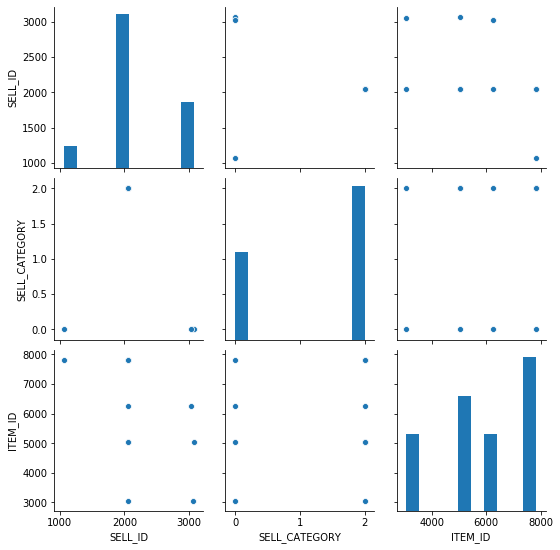

In [19]:
sns.pairplot(sold)

(array([ 360.,  509.,  629., 1351., 1082.,  122.,  389.,  240.,  482.,
         240.]),
 array([10.12 , 10.758, 11.396, 12.034, 12.672, 13.31 , 13.948, 14.586,
        15.224, 15.862, 16.5  ]),
 <a list of 10 Patch objects>)

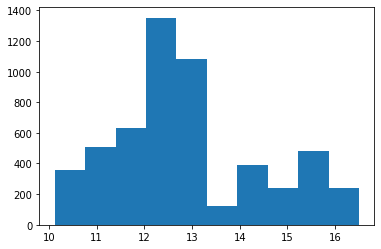

In [22]:
plt.hist(transactions['PRICE'])

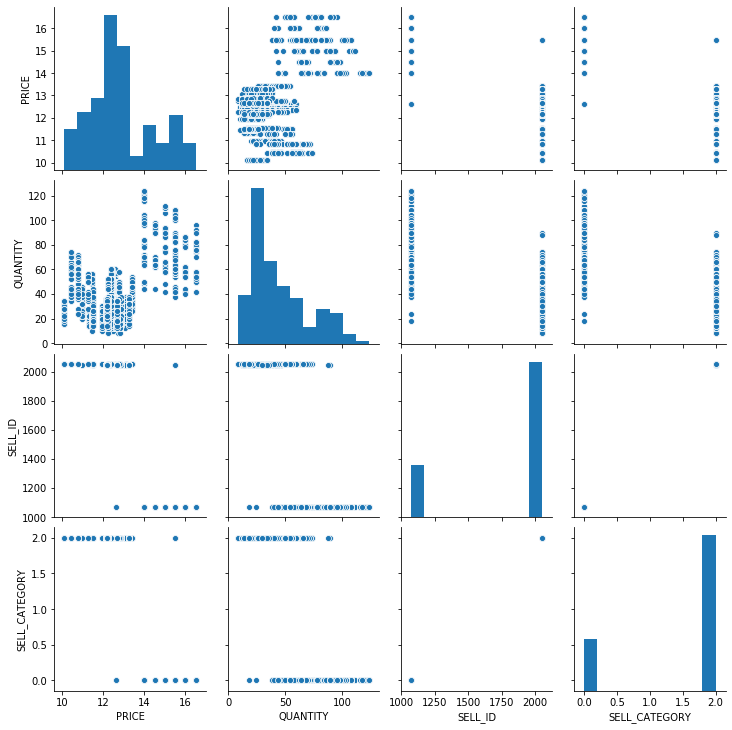

In [4]:
sns.pairplot(transactions)

In [ ]:
# the quantity purchased decreases as the price of the product increases

In [5]:
date_info.describe()

,YEAR,IS_WEEKEND,IS_SCHOOLBREAK,AVERAGE_TEMPERATURE,IS_OUTDOOR
count,1349.000000,1349.000000,1349.000000,1349.000000,1349.000000
mean,2013.375093,0.285397,0.204596,56.326019,0.862120
std,1.073073,0.451771,0.403556,20.227597,0.344902
min,2012.000000,0.000000,0.000000,14.000000,0.000000
25%,2012.000000,0.000000,0.000000,35.600000,1.000000
50%,2013.000000,0.000000,0.000000,60.800000,1.000000
75%,2014.000000,1.000000,0.000000,75.200000,1.000000
max,2015.000000,1.000000,1.000000,87.800000,1.000000


In [9]:
date_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1349 entries, 0 to 1348
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   CALENDAR_DATE        1349 non-null   object 
 1   YEAR                 1349 non-null   int64  
 2   HOLIDAY              1349 non-null   object 
 3   IS_WEEKEND           1349 non-null   int64  
 4   IS_SCHOOLBREAK       1349 non-null   int64  
 5   AVERAGE_TEMPERATURE  1349 non-null   float64
 6   IS_OUTDOOR           1349 non-null   int64  
dtypes: float64(1), int64(4), object(2)
memory usage: 73.9+ KB


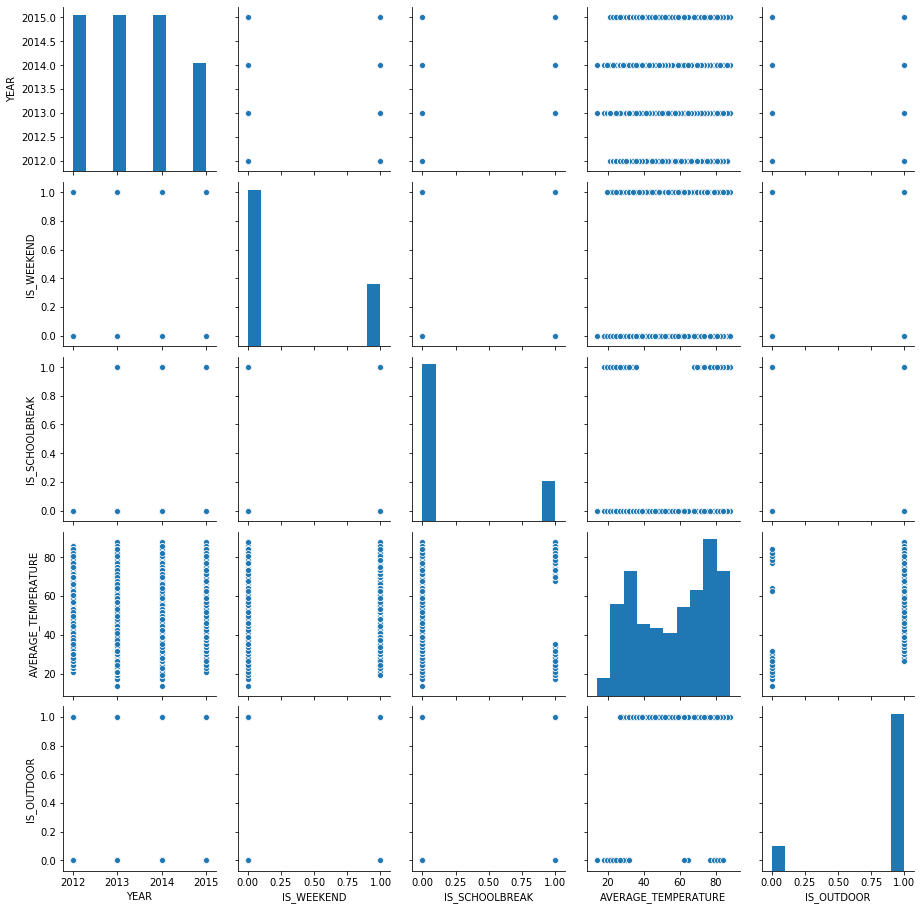

In [7]:
sns.pairplot(date_info)

### Understanding the data better

In [16]:
print("Start date:", date_info['CALENDAR_DATE'].min())
print("End date:", date_info['CALENDAR_DATE'].max())

Start date: 1/1/12
End date: 9/9/15


In [20]:
sold.head(13)

,SELL_ID,SELL_CATEGORY,ITEM_ID,ITEM_NAME
0,1070,0,7821,BURGER
1,3055,0,3052,COFFEE
2,3067,0,5030,COKE
3,3028,0,6249,LEMONADE
4,2051,2,7821,BURGER
5,2051,2,5030,COKE
6,2052,2,7821,BURGER
7,2052,2,6249,LEMONADE
8,2053,2,7821,BURGER
9,2053,2,5030,COKE


In [10]:
# get dummies for ITEM NAMES
pd.concat([sold.SELL_ID, pd.get_dummies(sold.ITEM_NAME)], axis=1)

,SELL_ID,BURGER,COFFEE,COKE,LEMONADE
0,1070,1,0,0,0
1,3055,0,1,0,0
2,3067,0,0,1,0
3,3028,0,0,0,1
4,2051,1,0,0,0
5,2051,0,0,1,0
6,2052,1,0,0,0
7,2052,0,0,0,1
8,2053,1,0,0,0
9,2053,0,0,1,0


In [11]:
pd.concat([sold.SELL_ID, pd.get_dummies(sold.ITEM_NAME)], axis=1).groupby(sold.SELL_ID).sum()

,SELL_ID,BURGER,COFFEE,COKE,LEMONADE
SELL_ID,,,,,
1070,1070,1,0,0,0
2051,4102,1,0,1,0
2052,4104,1,0,0,1
2053,6159,1,1,1,0
3028,3028,0,0,0,1
3055,3055,0,1,0,0
3067,3067,0,0,1,0


In [12]:
dataf = pd.merge(sold.drop(['ITEM_ID'],axis=1), transactions.drop(['SELL_CATEGORY'], axis= 1), on =  'SELL_ID')
dataf.head(20)
bdata = dataf.groupby(['SELL_ID', 'SELL_CATEGORY', 'ITEM_NAME', 'CALENDAR_DATE','PRICE']).QUANTITY.sum()

,SELL_ID,SELL_CATEGORY,ITEM_NAME,CALENDAR_DATE,PRICE,QUANTITY
0,1070,0,BURGER,01/01/12,15.5,46
1,1070,0,BURGER,01/02/12,15.5,70
2,1070,0,BURGER,01/03/12,15.5,62
3,1070,0,BURGER,01/04/12,15.5,88
4,1070,0,BURGER,01/05/12,15.5,104
5,1070,0,BURGER,01/06/12,15.5,100
6,1070,0,BURGER,01/07/12,15.5,70
7,1070,0,BURGER,01/08/12,15.5,70
8,1070,0,BURGER,01/09/12,15.5,106
9,1070,0,BURGER,01/10/12,15.5,108


In [13]:
bdata

SELL_ID  SELL_CATEGORY  ITEM_NAME  CALENDAR_DATE  PRICE
1070     0              BURGER     01/01/12       15.50     46
                                   01/01/13       15.50     60
                                   01/01/14       15.50     72
                                   01/01/15       14.00     66
                                   01/02/12       15.50     70
                                   01/02/13       15.50     68
                                   01/02/14       15.50     76
                                   01/02/15       14.00    102
                                   01/03/12       15.50     62
                                   01/03/13       15.50     70
                                   01/03/14       15.50     68
                                   01/03/15       14.00     68
                                   01/04/12       15.50     88
                                   01/04/13       15.50    100
                                   01/04/14       15.50     74

In [14]:
intermediate_data = bdata.reset_index()

In [15]:
intermediate_data.head()

,SELL_ID,SELL_CATEGORY,ITEM_NAME,CALENDAR_DATE,PRICE,QUANTITY
0,1070,0,BURGER,01/01/12,15.5,46
1,1070,0,BURGER,01/01/13,15.5,60
2,1070,0,BURGER,01/01/14,15.5,72
3,1070,0,BURGER,01/01/15,14.0,66
4,1070,0,BURGER,01/02/12,15.5,70


In [16]:
merge_data = pd.merge(intermediate_data, date_info, on = 'CALENDAR_DATE')
merge_data.head()

,SELL_ID,SELL_CATEGORY,ITEM_NAME,CALENDAR_DATE,PRICE,QUANTITY,YEAR,HOLIDAY,IS_WEEKEND,IS_SCHOOLBREAK,AVERAGE_TEMPERATURE,IS_OUTDOOR
0,1070,0,BURGER,1/13/12,15.50,100,2012,No Holiday,0,0,26.6,0
1,2051,2,BURGER,1/13/12,12.73,40,2012,No Holiday,0,0,26.6,0
2,2051,2,COKE,1/13/12,12.73,40,2012,No Holiday,0,0,26.6,0
3,2052,2,BURGER,1/13/12,12.75,26,2012,No Holiday,0,0,26.6,0
4,2052,2,LEMONADE,1/13/12,12.75,26,2012,No Holiday,0,0,26.6,0


In [35]:
merge_data.shape

(6696, 12)

In [17]:
# no holiday,no school break and not a weekend
bau_data = merge_data[(merge_data['HOLIDAY']=='No Holiday') & (merge_data['IS_SCHOOLBREAK']==0) & (merge_data['IS_WEEKEND']==0)]

In [18]:
# no data
bau_data.shape

(3768, 12)

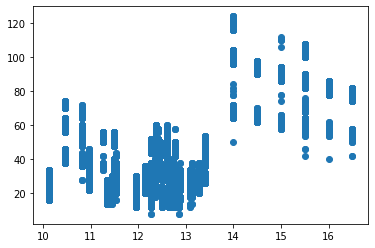

In [19]:
plt.scatter(merge_data['PRICE'],merge_data['QUANTITY'])

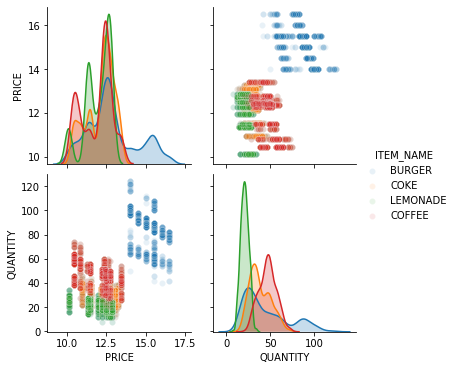

In [20]:
sns.pairplot(merge_data[['PRICE','QUANTITY','ITEM_NAME']],hue = 'ITEM_NAME',plot_kws = {'alpha':0.1})

The price density plot is bimodal. From the graph we can see that for all quantities, as the price is increased the quantity sold is decreased. Although coke is hidden in this view. 
We can go ahead and calculate the price elasticities for this.

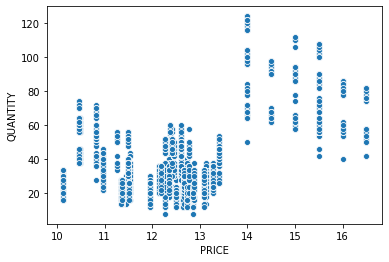

In [22]:
burger = merge_data[merge_data['ITEM_NAME']=='BURGER']
sns.scatterplot(x = burger.PRICE, y = burger.QUANTITY )

From the above scatter plot it is clearly visible that there must be different types of burgers being sold. Now let's see the same distribution when we differentiate with SELL_ID which indicates if the burger was a part of the combo and hence, must be treated separately.

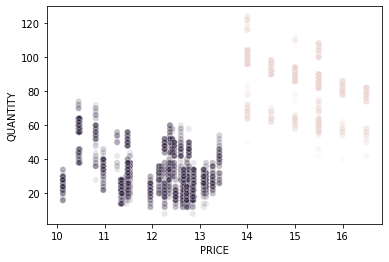

In [23]:
sns.scatterplot(data = burger, x = burger.PRICE, y = burger.QUANTITY , hue = 'SELL_ID', legend=False, alpha = 0.1)

In [24]:
np.unique(merge_data.SELL_ID)

array([1070, 2051, 2052, 2053], dtype=int64)

In [25]:
np.unique(merge_data.SELL_CATEGORY)

array([0, 2], dtype=int64)

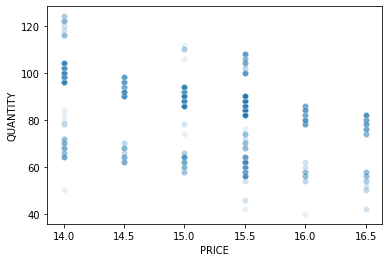

In [26]:
burger_1070 = merge_data[(merge_data['ITEM_NAME'] == 'BURGER') & (merge_data['SELL_ID'] == 1070)]

sns.scatterplot(data = burger_1070, x = burger_1070.PRICE, y = burger_1070.QUANTITY, alpha = 0.1)

### Modelling

                            OLS Regression Results                            
Dep. Variable:               QUANTITY   R-squared:                       0.156
Model:                            OLS   Adj. R-squared:                  0.155
Method:                 Least Squares   F-statistic:                     153.9
Date:                Wed, 21 Jul 2021   Prob (F-statistic):           1.45e-32
Time:                        14:56:27   Log-Likelihood:                -3436.0
No. Observations:                 837   AIC:                             6876.
Df Residuals:                     835   BIC:                             6885.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    210.9859     10.353     20.379      0.0

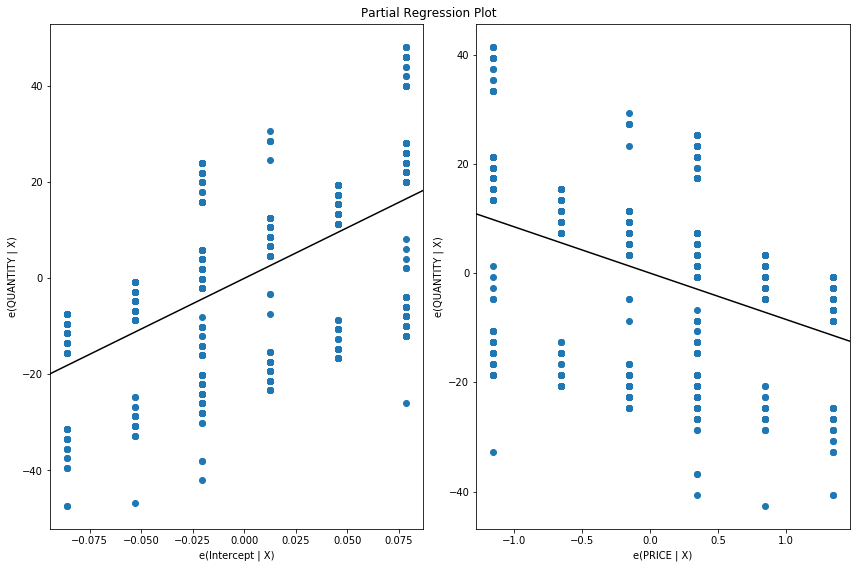

In [27]:
burger_model = ols("QUANTITY ~ PRICE",data = burger_1070).fit()
print(burger_model.summary())
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_partregress_grid(burger_model, fig=fig)

In [28]:
# add is outdoor to the bau data and fit the model again
bau2_data = merge_data[(merge_data['HOLIDAY']=='No Holiday') & (merge_data['IS_SCHOOLBREAK']==0) & (merge_data['IS_WEEKEND']==0) 
                       &(merge_data['IS_OUTDOOR']==1)]

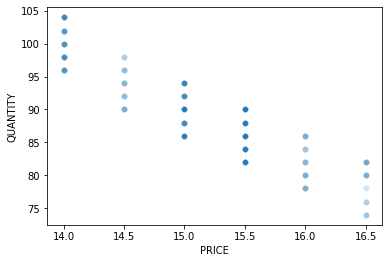

In [29]:
burger_1070 = bau2_data[(bau2_data['ITEM_NAME'] == 'BURGER') & (bau2_data['SELL_ID'] == 1070)]


sns.scatterplot(data = burger_1070, x = burger_1070.PRICE, y = burger_1070.QUANTITY, alpha = 0.1)

                            OLS Regression Results                            
Dep. Variable:               QUANTITY   R-squared:                       0.813
Model:                            OLS   Adj. R-squared:                  0.813
Method:                 Least Squares   F-statistic:                     1804.
Date:                Wed, 21 Jul 2021   Prob (F-statistic):          5.51e-153
Time:                        15:03:48   Log-Likelihood:                -1038.8
No. Observations:                 416   AIC:                             2082.
Df Residuals:                     414   BIC:                             2090.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    220.3600      3.090     71.322      0.0

<Figure size 864x576 with 0 Axes>

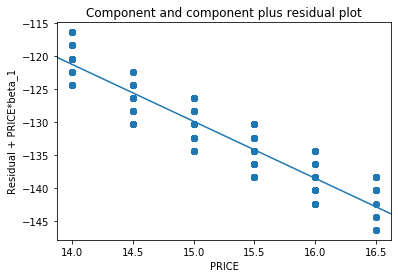

In [30]:
burger_model = ols("QUANTITY ~ PRICE", data=burger_1070).fit()
print(burger_model.summary())
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_ccpr(burger_model, "PRICE")

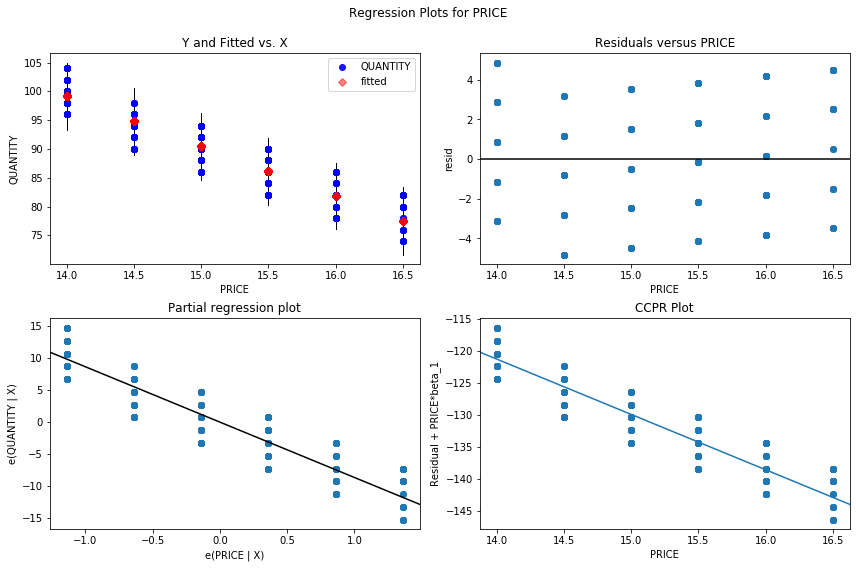

In [31]:
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_regress_exog(burger_model, "PRICE", fig=fig)

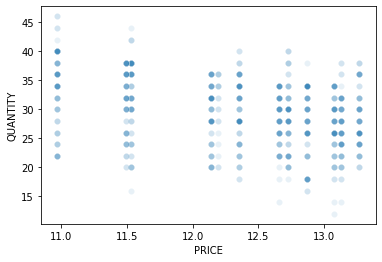

In [32]:
burger_2051 = merge_data[(merge_data['ITEM_NAME'] == 'BURGER') & (merge_data['SELL_ID'] == 2051)]

sns.scatterplot(data = burger_2051, x = burger_2051.PRICE, y = burger_2051.QUANTITY, alpha = 0.1)

                            OLS Regression Results                            
Dep. Variable:               QUANTITY   R-squared:                       0.130
Model:                            OLS   Adj. R-squared:                  0.129
Method:                 Least Squares   F-statistic:                     124.7
Date:                Wed, 21 Jul 2021   Prob (F-statistic):           4.45e-27
Time:                        15:25:55   Log-Likelihood:                -2597.8
No. Observations:                 837   AIC:                             5200.
Df Residuals:                     835   BIC:                             5209.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     64.9906      3.184     20.411      0.0

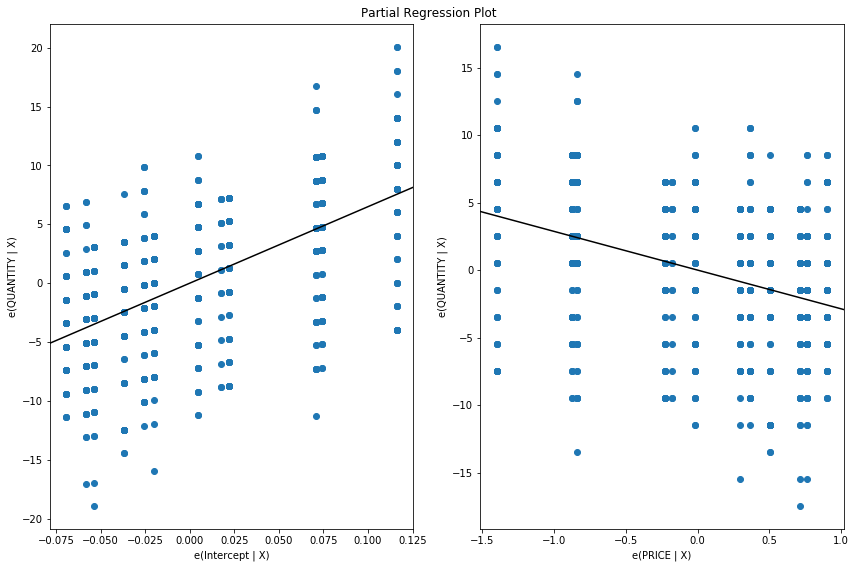

In [33]:
burger_model = ols("QUANTITY ~ PRICE", data=burger_2051).fit()
print(burger_model.summary())
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_partregress_grid(burger_model, fig=fig)

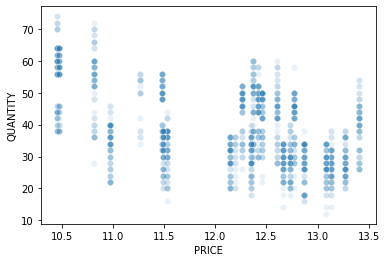

In [34]:
# Coke
coke = merge_data[merge_data['ITEM_NAME'] == 'COKE']

sns.scatterplot(x = coke.PRICE, y = coke.QUANTITY , alpha = 0.1)

                            OLS Regression Results                            
Dep. Variable:               QUANTITY   R-squared:                       0.246
Model:                            OLS   Adj. R-squared:                  0.245
Method:                 Least Squares   F-statistic:                     544.2
Date:                Wed, 21 Jul 2021   Prob (F-statistic):          1.94e-104
Time:                        15:27:10   Log-Likelihood:                -6279.2
No. Observations:                1674   AIC:                         1.256e+04
Df Residuals:                    1672   BIC:                         1.257e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    120.1140      3.522     34.100      0.0

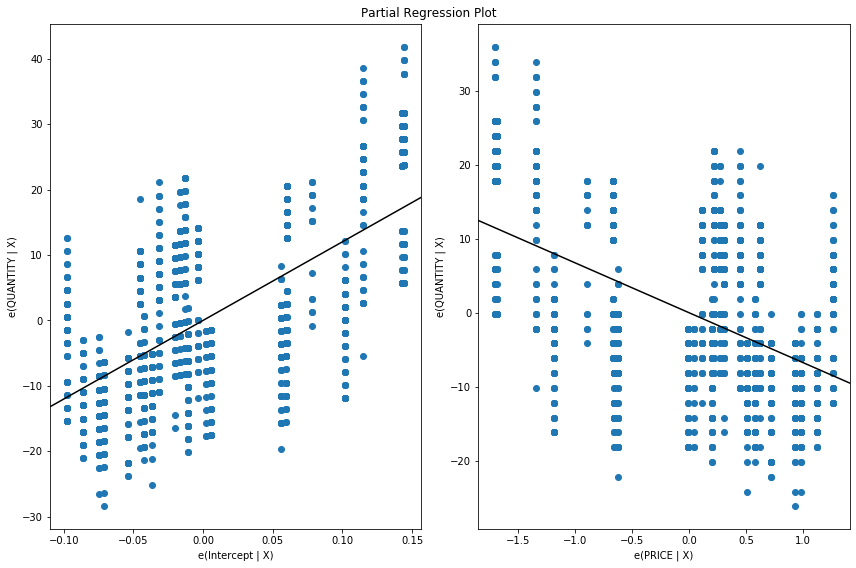

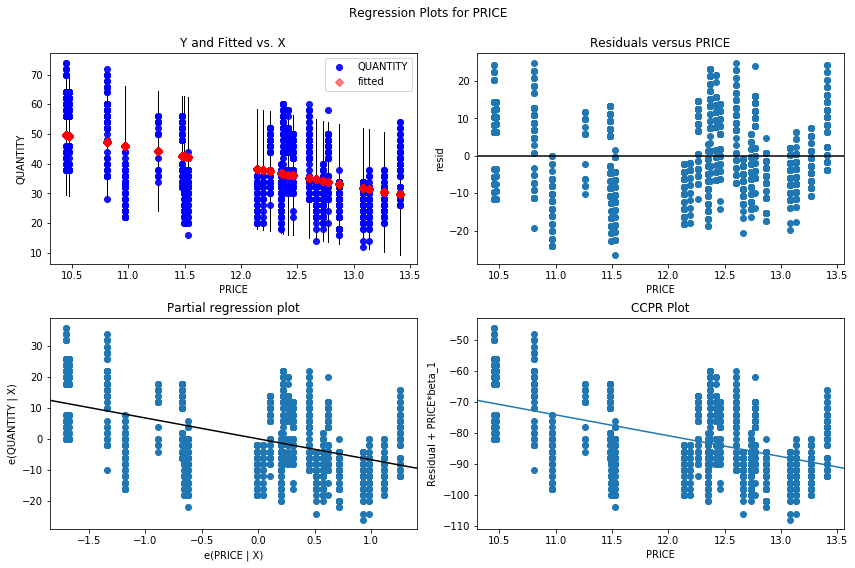

In [35]:
coke_model = ols("QUANTITY ~ PRICE", data=coke).fit()
print(coke_model.summary())
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_partregress_grid(coke_model, fig=fig)
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_regress_exog(coke_model, 'PRICE', fig=fig)

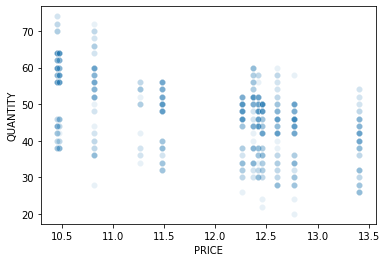

In [36]:
coffee = merge_data[merge_data['ITEM_NAME'] == 'COFFEE']

sns.scatterplot(x = coffee.PRICE, y = coffee.QUANTITY , alpha = 0.1)

                            OLS Regression Results                            
Dep. Variable:               QUANTITY   R-squared:                       0.281
Model:                            OLS   Adj. R-squared:                  0.281
Method:                 Least Squares   F-statistic:                     327.0
Date:                Wed, 21 Jul 2021   Prob (F-statistic):           6.20e-62
Time:                        15:29:41   Log-Likelihood:                -2968.5
No. Observations:                 837   AIC:                             5941.
Df Residuals:                     835   BIC:                             5951.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    113.0116      3.673     30.770      0.0

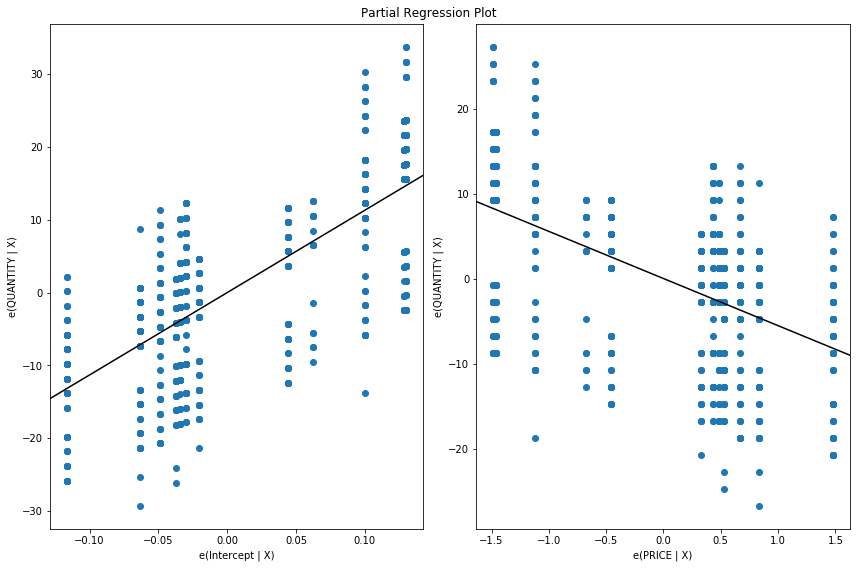

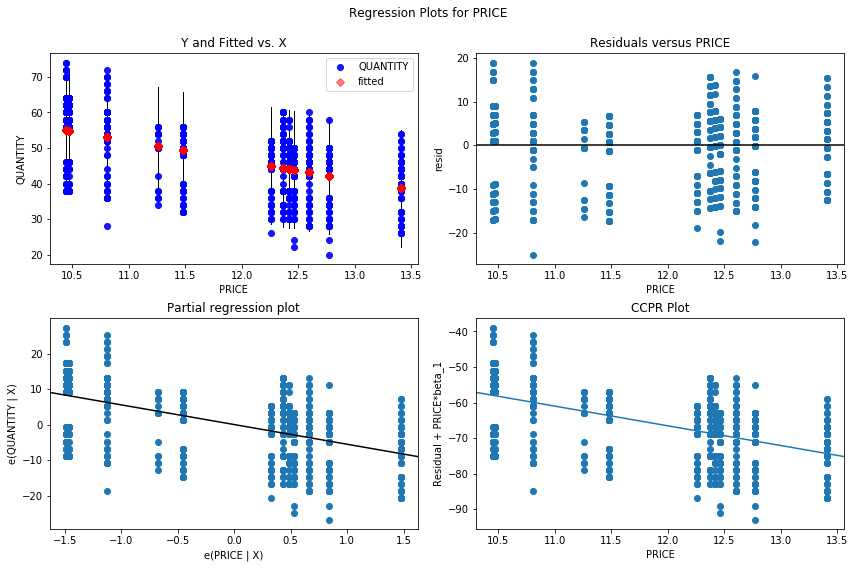

In [37]:
coffee_model = ols("QUANTITY ~ PRICE", data=coffee).fit()
print(coffee_model.summary())
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_partregress_grid(coffee_model, fig=fig)
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_regress_exog(coffee_model, 'PRICE', fig=fig)

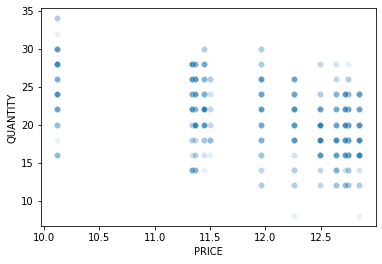

In [38]:
lemonade = merge_data[merge_data['ITEM_NAME'] == 'LEMONADE']

sns.scatterplot(x = lemonade.PRICE, y = lemonade.QUANTITY , alpha = 0.1)

                            OLS Regression Results                            
Dep. Variable:               QUANTITY   R-squared:                       0.215
Model:                            OLS   Adj. R-squared:                  0.214
Method:                 Least Squares   F-statistic:                     228.7
Date:                Fri, 23 Jul 2021   Prob (F-statistic):           7.46e-46
Time:                        18:09:57   Log-Likelihood:                -2347.4
No. Observations:                 837   AIC:                             4699.
Df Residuals:                     835   BIC:                             4708.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     51.4615      2.025     25.416      0.0

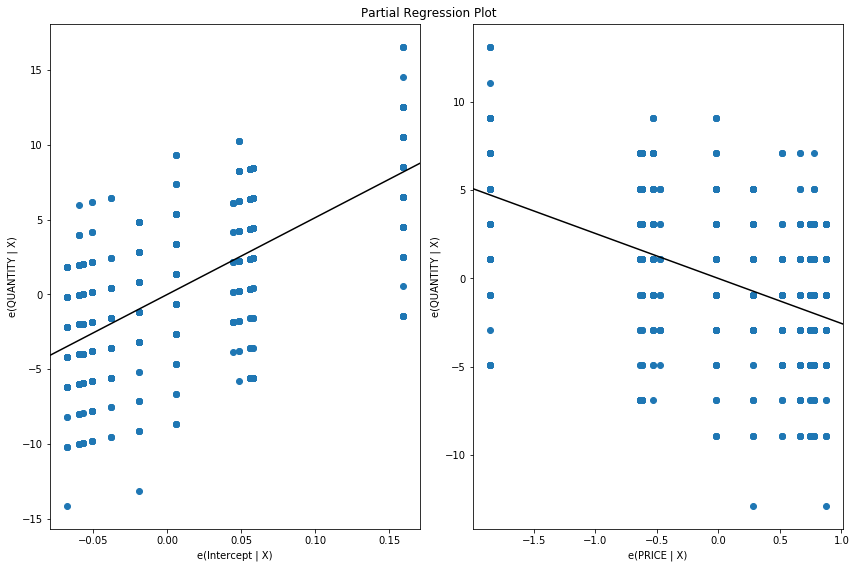

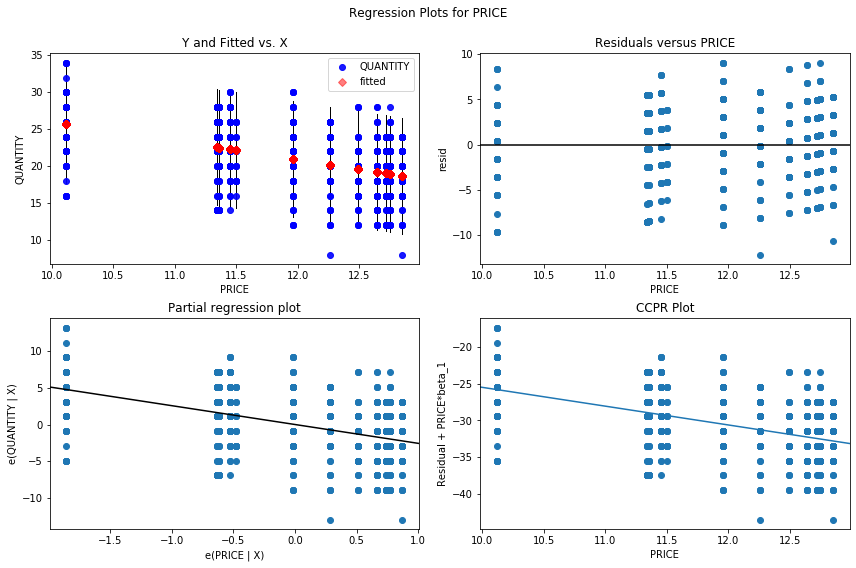

In [40]:
lemonade_model = ols("QUANTITY ~ PRICE", data=lemonade).fit()
print(lemonade_model.summary())
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_partregress_grid(lemonade_model, fig=fig)
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_regress_exog(lemonade_model, 'PRICE', fig=fig)

### Elasticities

In [41]:
elasticities = {}

In [42]:
def create_model_and_find_elasticity(data):
    model = ols("QUANTITY ~ PRICE", data).fit()
    price_elasticity = model.params[1]
    print("Price elasticity of the product: " + str(price_elasticity))
    print(model.summary())
    fig = plt.figure(figsize=(12,8))
    fig = sm.graphics.plot_partregress_grid(model, fig=fig)
    return price_elasticity, model

Price elasticity of the product: -8.658581488470569
                            OLS Regression Results                            
Dep. Variable:               QUANTITY   R-squared:                       0.813
Model:                            OLS   Adj. R-squared:                  0.813
Method:                 Least Squares   F-statistic:                     1804.
Date:                Fri, 23 Jul 2021   Prob (F-statistic):          5.51e-153
Time:                        18:18:38   Log-Likelihood:                -1038.8
No. Observations:                 416   AIC:                             2082.
Df Residuals:                     414   BIC:                             2090.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------


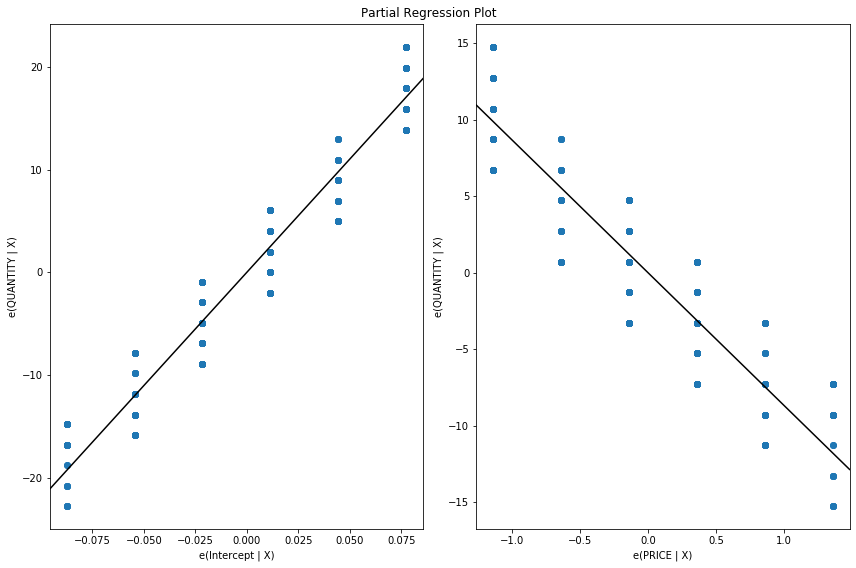

In [43]:
# price elasticity of burger 1070
price_elasticity, model_burger_1070 = create_model_and_find_elasticity(burger_1070)
elasticities['burger_1070'] = price_elasticity

Price elasticity of the product: -3.618990615456312
                            OLS Regression Results                            
Dep. Variable:               QUANTITY   R-squared:                       0.467
Model:                            OLS   Adj. R-squared:                  0.466
Method:                 Least Squares   F-statistic:                     363.3
Date:                Fri, 23 Jul 2021   Prob (F-statistic):           1.34e-58
Time:                        18:20:39   Log-Likelihood:                -1021.5
No. Observations:                 416   AIC:                             2047.
Df Residuals:                     414   BIC:                             2055.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------


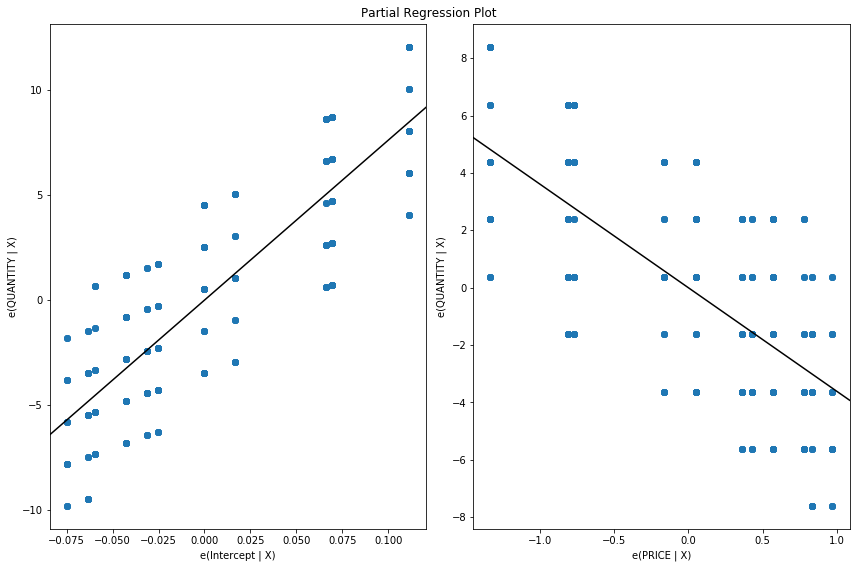

In [44]:
# price elasticity of burger 2051
# meaning if we were to increase the price for burger by 1% or R1 the demand for burger 
# wuould change or decrease by -3 (keeping everything else constant)

burger2051_data = bau2_data[(bau2_data['ITEM_NAME'] == "BURGER") & (bau2_data['SELL_ID'] == 2051)]
elasticities['burger_2051'], model_burger_2051 = create_model_and_find_elasticity(burger2051_data)

Price elasticity of the product: -6.745224661560964
                            OLS Regression Results                            
Dep. Variable:               QUANTITY   R-squared:                       0.246
Model:                            OLS   Adj. R-squared:                  0.245
Method:                 Least Squares   F-statistic:                     544.2
Date:                Fri, 23 Jul 2021   Prob (F-statistic):          1.94e-104
Time:                        18:24:49   Log-Likelihood:                -6279.2
No. Observations:                1674   AIC:                         1.256e+04
Df Residuals:                    1672   BIC:                         1.257e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------


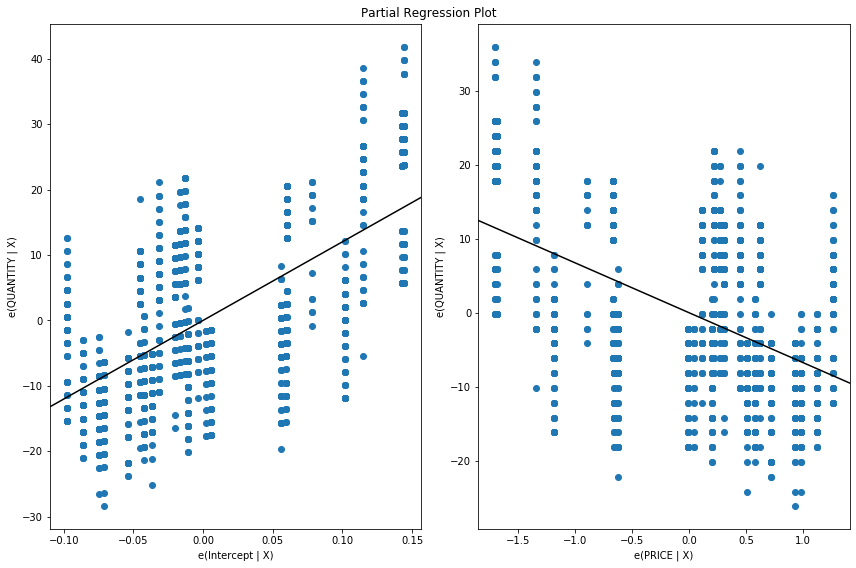

In [46]:
price_elasticity, coke_model = create_model_and_find_elasticity(coke)
elasticities['coke'] = price_elasticity

In [47]:
# elasticities of each product
elasticities

{'burger_1070': -8.658581488470569,
 'burger_2051': -3.618990615456312,
 'coke': -6.745224661560964}

### Find optimal price for maximum profit

In [48]:
def find_optimal_price(data, model, buying_price):
    start_price = data.PRICE.min() - 1
    end_price = data.PRICE.min() + 10
    test = pd.DataFrame(columns = ["PRICE", "QUANTITY"])
    test['PRICE'] = np.arange(start_price, end_price,0.01)
    test['QUANTITY'] = model.predict(test['PRICE'])
    test['PROFIT'] = (test["PRICE"] - buying_price) * test["QUANTITY"]
    plt.plot(test['PRICE'],test['QUANTITY'])
    plt.plot(test['PRICE'],test['PROFIT'])
    plt.show()
    ind = np.where(test['PROFIT'] == test['PROFIT'].max())[0][0]
    values_at_max_profit = test.iloc[[ind]]
    return values_at_max_profit

In [49]:
optimal_price = {}
buying_price = 9

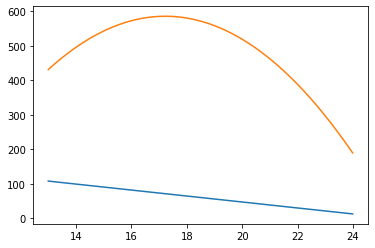

In [50]:
optimal_price['burger_1070'] = find_optimal_price(burger_1070, model_burger_1070, buying_price)

In [51]:
optimal_price

{'burger_1070':      PRICE   QUANTITY      PROFIT
 422  17.22  71.259194  585.750572}

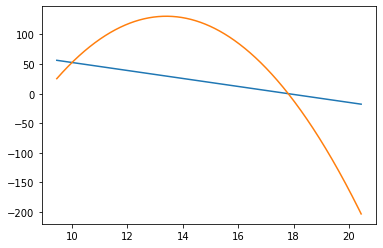

In [52]:
optimal_price['coke'] = find_optimal_price(coke, coke_model, buying_price)

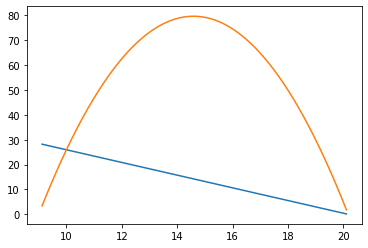

In [53]:
optimal_price['lemonade'] = find_optimal_price(lemonade, lemonade_model, buying_price)

In [54]:
optimal_price

{'burger_1070':      PRICE   QUANTITY      PROFIT
 422  17.22  71.259194  585.750572,
 'coke':      PRICE   QUANTITY      PROFIT
 395   13.4  29.727952  130.802989,
 'lemonade':      PRICE  QUANTITY     PROFIT
 547  14.59  14.24487  79.628823}

### Conclusion

This is the price the cafe should set on its item to earn maximum profit based on its previous sales data. It is important to note that this is on a normal day. On 'other' days such as a holiday, or an event taking place have a different impact on customer buying behaviours and pattern. Usually an increase in consumption is seen on such days. These must be treated separately. Similarly, it is important to remove any external effects other than price that will affect the purchase behaviours of customers including the datapoints when the item was on discount.

Once, the new prices are put up, it is important to continuously monitor the sales and profit. If this method of pricing is a part of a product, a dashboard can be created for the purpose of monitoring these items and calculating the lift in the profit.